# Assignment 3 - Analyzing the American Community Survey

The American Community Survey is a long form survey which the United States Census conducts on a rolling basis. Beyond the census which occurs every ten years in the States, the American Community Survey (ACS) asks much more detailed questions about employment, income, health, military service, and much more. If you are interested in the full list of variables involved in the ACS, you can check out the codebook [here](docs/ACS2005-Codebook.pdf).

With this assignment, you will be tasked to analyze the American Community Survey responses for the survey released in 2005, for the US state of Wisconsin. The main thing we want to understand in the ACS for Wisconsin is the relationship between income and education. Economists have long thought that there is a direct relationship between income and education. However, lots of things can mediate this relationship: race, gender, whether your parents went to college, and where you live.

For this assignment, you will look at the relationship between logged annual personal earnings (<code>L_PERNP</code>) and years in school (<code>SCHLN</code>). These are both **continuous** variables, meaning they contain numerical values. You will also look at two **ordinal** or **categorical** variables: worked in the last week (<code>UWRK</code>) and disability status (<code>DS</code>). <code>UWRK</code> takes on two values: "Worked" and "Did not work". <code>DS</code> also takes on two values: "With a disability" and "Without a disability".

You are going to do a preliminary investigation of the relationship between these two variables. You will do this by using both data modeling and visualisation tools available in Python. You will also have to **write up your results** in the noted Markdown cells as you go along. In this way, this notebook will look a lot like your final report.

In [137]:
## import statements
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from scipy.stats.stats import pearsonr
from statsmodels.formula.api import ols

In [138]:
## This loads the ACS Wisconsin data with some special parameters
df = pd.read_csv("data/acs-wi.csv", index_col = 0, low_memory = False)

## This prepares the "personal earnings" variable by getting rid of all 
## values less than or equal to zero, and transforming to a logarithm 
## scale.
df = df[df['PERNP'] > 0]
df["L_PERNP"] = np.log(df["PERNP"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a255898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x137cbfac8>]], dtype=object)

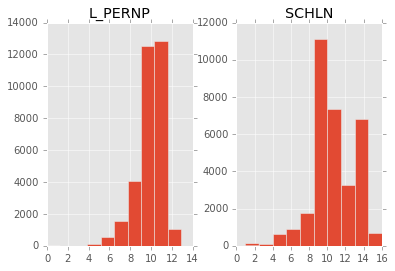

In [139]:
## TODO 1: Plot a histogram of both L_PERNP and SCHLN. 
## These should be in the same plot.
df[['L_PERNP', 'SCHLN']].hist()

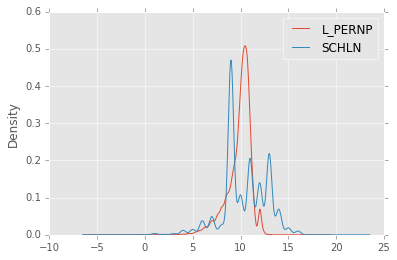

In [140]:
## TODO 2: Plot a density plot of both L_PERNP and SCHLN. 
## These should be in the same plot.
df[['L_PERNP', 'SCHLN']].plot.kde()

In [141]:
## TODO 3: Calculate the Pearson correlation between L_PERNP and SCHLN.
pearsonr(df['L_PERNP'], df['SCHLN'])

(0.33180176879360018, 0.0)

**TODO 4: Based on TODOs 1-3, what can you say about the relationship between L_PERNP and SCHLN?**

Write your answer here.

In [142]:
## TODO 5: Calculate the number of times each value in UWRK appears in the dataset.
df['UWRK'].value_counts()

Worked          27422
Did not work     4759
Name: UWRK, dtype: int64

In [143]:
## TODO 6: Calculate the number of times each value in DS appears in the dataset.
df['DS'].value_counts()

Without a disability    30306
With a disability        2425
Name: DS, dtype: int64

In [144]:
## TODO 7: Calculate the mean of L_PERNP and SCHLN, grouped by UWRK.
gr = df.groupby('UWRK')
gr[['L_PERNP', 'SCHLN']].mean()

,L_PERNP,SCHLN
UWRK,,
Did not work,8.968159,9.857323
Worked,10.051383,10.503610


In [145]:
## TODO 8: Calculate the mean of L_PERNP and SCHLN, grouped by DS.
gr = df.groupby('DS')
gr['L_PERNP', 'SCHLN'].mean()

,L_PERNP,SCHLN
DS,,
With a disability,9.345433,9.695670
Without a disability,9.932609,10.445192


**TODO 9: Based on TODOs 5 and 6, discuss what percentage of the Wisconsin population have worked in the past week and how many have a disability.**

Write your answer here.

**TODO 10: Based on TODOs 7 and 8, discuss what effect not working in the past week or having a disability seems to have on personal earnings and years in school.**

Write your answer here.

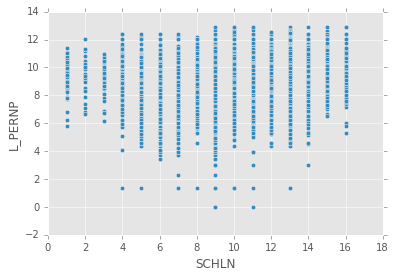

In [146]:
## TODO 11: Create the scatter plot of SCHLN vs. L_PERNP. 
## Put SCHLN on the x-axis and L_PERNP on the y-axis.
df.plot.scatter(x = 'SCHLN', y = 'L_PERNP')

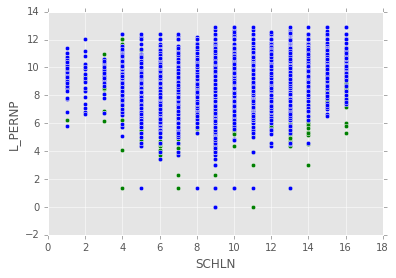

In [152]:
## TODO 12: Create the same plot as TODO 11, separated by UWRK.
## "Did not work" should be in green and "Worked" in blue. 
ax_dn  = df[df['UWRK'] == 'Did not work'].plot.scatter(x = 'SCHLN', y = 'L_PERNP', color = 'Green')
ax_all = df[df['UWRK'] == 'Worked'].plot.scatter(x = 'SCHLN', y = 'L_PERNP', color = 'Blue', ax = ax_dn)
ax_all

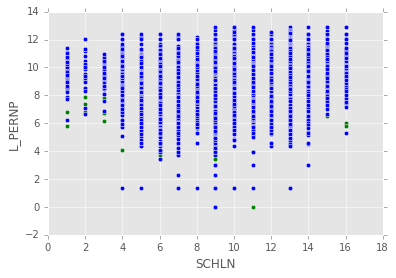

In [153]:
## TODO 13: Create the same plot as TODO 11, separated by DS.
## "With a disability" should be in green and "Without a disability" in blue. 
ax_ds  = df[df['DS'] == 'With a disability'].plot.scatter(x = 'SCHLN', y = 'L_PERNP', color = 'Green')
ax_all = df[df['DS'] == 'Without a disability'].plot.scatter(x = 'SCHLN', y = 'L_PERNP', color = 'Blue', ax = ax_ds)
ax_all

In [149]:
## TODO 14: Run the linear regression of SCHLN on L_PERNP.
## L_PERNP is the dependent variable and SCHLN is the independent variable.
model_bivariate = ols("L_PERNP ~ SCHLN", df).fit()
model_bivariate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                L_PERNP   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     4049.
Date:                Sun, 30 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:32:49   Log-Likelihood:                -52160.
No. Observations:               32731   AIC:                         1.043e+05
Df Residuals:                   32729   BIC:                         1.043e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.0055      0.030    263.994      0.000         7.946     8.065
SCHLN          0.1813      0.003     63.632      0.000         0.176     0.187
==============================================================================
Omnibus:                     9500.766   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32693.157
Skew:                          -1.454   Prob(JB):                         0.00
Kurtosis:                       6.939   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
## TODO 15: Run the linear regression of SCHLN, UWRK, and DS on L_PERNP.
## L_PERNP is the dependent variable and SCHLN, UWRK, and DS are the independent variables.
model_full = ols("L_PERNP ~ SCHLN + UWRK + DS", df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                L_PERNP   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     2531.
Date:                Sun, 30 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:32:50   Log-Likelihood:                -49747.
No. Observations:               32181   AIC:                         9.950e+04
Df Residuals:                   32177   BIC:                         9.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      7.0459      0.037    189.827      0.000         6.973     7.119
UWRK[T.Worked]                 0.9497      0.018     52.731      0.000         0.914     0.985
DS[T.Without a disability]     0.3259      0.024     13.329      0.000         0.278     0.374
SCHLN                          0.1666      0.003     59.858      0.000         0.161     0.172
==============================================================================
Omnibus:                     8078.176   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27410.090
Skew:                          -1.256   Prob(JB):                         0.00
Kurtosis:                       6.760   Cond. No.                         68.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**TODO 16: Based on all of the above, what can you say about the relationship between L_PERNP and SCHLN? What can you say about how UWRK and DS affect personal earnings?**

Write your answer here.